In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is available and configured:", gpus)
    except RuntimeError as e:
        print("RuntimeError:", e)
else:
    print("No GPU detected by TensorFlow")


GPU is available and configured: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
from data_loading import OxfordPetDataset
from augmentation import random_flip, augmentation_layers_geometric, augmentation_layers_color
from models import UNet_model #2.a, 2.b exercises
from experiment import plot_results

# Load the data
dataset = OxfordPetDataset()
dataset.load_data()
dataset.one_hot_encoding()

# Resize and normalize
reshape_size = (128, 128)
dataset.res_norm(reshape_size)

train = dataset.train_raw
val = dataset.val_raw
test = dataset.test_raw
ds_info = dataset.ds_info
get_label_name = dataset.get_label_name

print("\n")


Number of classes: 37
Number of training samples: 3312
Number of validation samples: 368
Number of test samples: 3669




In [10]:
def extract_image_mask(data):
    """Extract image and mask from dictionary"""
    print(data)
    return data['image'], data['image']

# Apply to all datasets
train1 = train.map(extract_image_mask)
val1 = val.map(extract_image_mask)
test1 = test.map(extract_image_mask)



{'image': <tf.Tensor 'args_0:0' shape=(128, 128, 3) dtype=float32>, 'label': <tf.Tensor 'args_1:0' shape=(37,) dtype=float32>, 'segmentation_mask': <tf.Tensor 'args_2:0' shape=(128, 128, 1) dtype=uint8>}
{'image': <tf.Tensor 'args_0:0' shape=(128, 128, 3) dtype=float32>, 'label': <tf.Tensor 'args_1:0' shape=(37,) dtype=float32>, 'segmentation_mask': <tf.Tensor 'args_2:0' shape=(128, 128, 1) dtype=uint8>}
{'image': <tf.Tensor 'args_0:0' shape=(128, 128, 3) dtype=float32>, 'label': <tf.Tensor 'args_1:0' shape=(37,) dtype=float32>, 'segmentation_mask': <tf.Tensor 'args_2:0' shape=(128, 128, 1) dtype=uint8>}


Autoencoder Implementation & Training

In [11]:
BATCH_SIZE = 32

# Batch the data and use prefetching to optimize loading speed
train_ds = train1.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val1.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test1.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from models import Autoencoder
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers

# Create top-level folder and subdirectories if they don't exist
top_dir = "task_2b"
results_dir = os.path.join(top_dir, "autoencoder_training_results")
models_dir = os.path.join(top_dir, "autoencoder_models")
weights_dir = os.path.join(top_dir, "autoencoder_weights")

os.makedirs(results_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(weights_dir, exist_ok=True)

# Define folder for saving the best autoencoder model
best_model_folder = os.path.join(top_dir, "autoencoder_best_baseline_model")

# Initialize and compile autoencoder
autoencoder = Autoencoder(input_shape=(256, 256, 3))
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Define Early Stopping (restores best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True
)

# Define ModelCheckpoint to save the best model into the specified folder
checkpoint = ModelCheckpoint(
    best_model_folder,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Train the model with early stopping & 100 epochs (adjust epochs as needed)
history = autoencoder.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[checkpoint, early_stopping]
)



Epoch 1/100
104/104 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.5645   
Epoch 1: val_loss improved from inf to 0.00960, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 69s 355ms/step - loss: 0.0250 - accuracy: 0.5645 - val_loss: 0.0096 - val_accuracy: 0.6402
Epoch 2/100
104/104 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.6569 
Epoch 2: val_loss improved from 0.00960 to 0.00576, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 325ms/step - loss: 0.0070 - accuracy: 0.6569 - val_loss: 0.0058 - val_accuracy: 0.6994
Epoch 3/100
104/104 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.7613 
Epoch 3: val_loss improved from 0.00576 to 0.00449, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 32s 306ms/step - loss: 0.0053 - accuracy: 0.7613 - val_loss: 0.0045 - val_accuracy: 0.8082
Epoch 4/100
104/104 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.7987  
Epoch 4: val_loss improved from 0.00449 to 0.00412, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 32s 309ms/step - loss: 0.0045 - accuracy: 0.7987 - val_loss: 0.0041 - val_accuracy: 0.8044
Epoch 5/100
104/104 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.8069  
Epoch 5: val_loss improved from 0.00412 to 0.00382, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 340ms/step - loss: 0.0042 - accuracy: 0.8069 - val_loss: 0.0038 - val_accuracy: 0.8260
Epoch 6/100
104/104 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.8216  
Epoch 6: val_loss improved from 0.00382 to 0.00368, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 339ms/step - loss: 0.0038 - accuracy: 0.8216 - val_loss: 0.0037 - val_accuracy: 0.8337
Epoch 7/100
104/104 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.8083  
Epoch 7: val_loss improved from 0.00368 to 0.00346, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 339ms/step - loss: 0.0038 - accuracy: 0.8083 - val_loss: 0.0035 - val_accuracy: 0.8402
Epoch 8/100
104/104 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.8265  
Epoch 8: val_loss improved from 0.00346 to 0.00337, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 329ms/step - loss: 0.0035 - accuracy: 0.8265 - val_loss: 0.0034 - val_accuracy: 0.8267
Epoch 9/100
104/104 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.8281  
Epoch 9: val_loss improved from 0.00337 to 0.00330, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 335ms/step - loss: 0.0033 - accuracy: 0.8281 - val_loss: 0.0033 - val_accuracy: 0.8232
Epoch 10/100
104/104 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.8234  
Epoch 10: val_loss improved from 0.00330 to 0.00322, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 325ms/step - loss: 0.0033 - accuracy: 0.8234 - val_loss: 0.0032 - val_accuracy: 0.8393
Epoch 11/100
104/104 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.8254  
Epoch 11: val_loss did not improve from 0.00322
104/104 [==============================] - 27s 256ms/step - loss: 0.0032 - accuracy: 0.8254 - val_loss: 0.0033 - val_accuracy: 0.8317
Epoch 12/100
104/104 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.8319 
Epoch 12: val_loss improved from 0.00322 to 0.00303, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 323ms/step - loss: 0.0030 - accuracy: 0.8319 - val_loss: 0.0030 - val_accuracy: 0.8201
Epoch 13/100
104/104 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.8291  
Epoch 13: val_loss improved from 0.00303 to 0.00290, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 32s 307ms/step - loss: 0.0030 - accuracy: 0.8291 - val_loss: 0.0029 - val_accuracy: 0.8358
Epoch 14/100
104/104 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.8280 
Epoch 14: val_loss improved from 0.00290 to 0.00278, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 322ms/step - loss: 0.0029 - accuracy: 0.8280 - val_loss: 0.0028 - val_accuracy: 0.8468
Epoch 15/100
104/104 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.8228 
Epoch 15: val_loss improved from 0.00278 to 0.00277, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 343ms/step - loss: 0.0029 - accuracy: 0.8228 - val_loss: 0.0028 - val_accuracy: 0.8417
Epoch 16/100
104/104 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.8335  
Epoch 16: val_loss improved from 0.00277 to 0.00270, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 335ms/step - loss: 0.0028 - accuracy: 0.8335 - val_loss: 0.0027 - val_accuracy: 0.8341
Epoch 17/100
104/104 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.8408  
Epoch 17: val_loss improved from 0.00270 to 0.00265, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 37s 351ms/step - loss: 0.0027 - accuracy: 0.8408 - val_loss: 0.0026 - val_accuracy: 0.8449
Epoch 18/100
104/104 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.8327  
Epoch 18: val_loss improved from 0.00265 to 0.00264, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 333ms/step - loss: 0.0028 - accuracy: 0.8327 - val_loss: 0.0026 - val_accuracy: 0.8432
Epoch 19/100
104/104 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.8392  
Epoch 19: val_loss did not improve from 0.00264
104/104 [==============================] - 27s 258ms/step - loss: 0.0026 - accuracy: 0.8392 - val_loss: 0.0028 - val_accuracy: 0.8246
Epoch 20/100
104/104 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.8394 
Epoch 20: val_loss did not improve from 0.00264
104/104 [==============================] - 27s 256ms/step - loss: 0.0026 - accuracy: 0.8394 - val_loss: 0.0028 - val_accuracy: 0.8060
Epoch 21/100
104/104 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.8401 
Epoch 21: val_loss improved from 0.00264 to 0.00258, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 336ms/step - loss: 0.0025 - accuracy: 0.8401 - val_loss: 0.0026 - val_accuracy: 0.8358
Epoch 22/100
104/104 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.8288  
Epoch 22: val_loss improved from 0.00258 to 0.00256, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 326ms/step - loss: 0.0026 - accuracy: 0.8288 - val_loss: 0.0026 - val_accuracy: 0.8473
Epoch 23/100
104/104 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.8427  
Epoch 23: val_loss improved from 0.00256 to 0.00242, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 333ms/step - loss: 0.0025 - accuracy: 0.8427 - val_loss: 0.0024 - val_accuracy: 0.8451
Epoch 24/100
104/104 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.8329  
Epoch 24: val_loss did not improve from 0.00242
104/104 [==============================] - 27s 256ms/step - loss: 0.0025 - accuracy: 0.8329 - val_loss: 0.0027 - val_accuracy: 0.8503
Epoch 25/100
104/104 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.8392 
Epoch 25: val_loss did not improve from 0.00242
104/104 [==============================] - 27s 256ms/step - loss: 0.0024 - accuracy: 0.8392 - val_loss: 0.0024 - val_accuracy: 0.8529
Epoch 26/100
104/104 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.8357 
Epoch 26: val_loss improved from 0.00242 to 0.00241, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 334ms/step - loss: 0.0025 - accuracy: 0.8357 - val_loss: 0.0024 - val_accuracy: 0.8563
Epoch 27/100
104/104 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.8476  
Epoch 27: val_loss did not improve from 0.00241
104/104 [==============================] - 27s 255ms/step - loss: 0.0024 - accuracy: 0.8476 - val_loss: 0.0029 - val_accuracy: 0.8415
Epoch 28/100
104/104 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.8394 
Epoch 28: val_loss improved from 0.00241 to 0.00238, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 324ms/step - loss: 0.0024 - accuracy: 0.8394 - val_loss: 0.0024 - val_accuracy: 0.8530
Epoch 29/100
104/104 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.8319  
Epoch 29: val_loss improved from 0.00238 to 0.00232, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 325ms/step - loss: 0.0024 - accuracy: 0.8319 - val_loss: 0.0023 - val_accuracy: 0.8449
Epoch 30/100
104/104 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.8433 
Epoch 30: val_loss did not improve from 0.00232
104/104 [==============================] - 27s 255ms/step - loss: 0.0023 - accuracy: 0.8433 - val_loss: 0.0025 - val_accuracy: 0.8458
Epoch 31/100
104/104 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.8330 
Epoch 31: val_loss improved from 0.00232 to 0.00228, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 338ms/step - loss: 0.0024 - accuracy: 0.8330 - val_loss: 0.0023 - val_accuracy: 0.8513
Epoch 32/100
104/104 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 0.8317  
Epoch 32: val_loss did not improve from 0.00228
104/104 [==============================] - 27s 258ms/step - loss: 0.0025 - accuracy: 0.8317 - val_loss: 0.0024 - val_accuracy: 0.8546
Epoch 33/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8491 
Epoch 33: val_loss did not improve from 0.00228
104/104 [==============================] - 40s 381ms/step - loss: 0.0022 - accuracy: 0.8491 - val_loss: 0.0023 - val_accuracy: 0.8452
Epoch 34/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8451 
Epoch 34: val_loss did not improve from 0.00228
104/104 [==============================] - 27s 256ms/step - loss: 0.0022 - accuracy: 0.8451 - val_loss: 0.0024 - val_accuracy: 0.8448
Epoch 35/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 31s 295ms/step - loss: 0.0023 - accuracy: 0.8412 - val_loss: 0.0023 - val_accuracy: 0.8503
Epoch 36/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8520  
Epoch 36: val_loss did not improve from 0.00226
104/104 [==============================] - 27s 257ms/step - loss: 0.0022 - accuracy: 0.8520 - val_loss: 0.0023 - val_accuracy: 0.8430
Epoch 37/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8401 
Epoch 37: val_loss did not improve from 0.00226
104/104 [==============================] - 27s 258ms/step - loss: 0.0022 - accuracy: 0.8401 - val_loss: 0.0023 - val_accuracy: 0.8503
Epoch 38/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8479 
Epoch 38: val_loss improved from 0.00226 to 0.00222, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 31s 302ms/step - loss: 0.0022 - accuracy: 0.8479 - val_loss: 0.0022 - val_accuracy: 0.8533
Epoch 39/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8479 
Epoch 39: val_loss did not improve from 0.00222
104/104 [==============================] - 27s 258ms/step - loss: 0.0022 - accuracy: 0.8479 - val_loss: 0.0023 - val_accuracy: 0.8239
Epoch 40/100
104/104 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.8385 
Epoch 40: val_loss did not improve from 0.00222
104/104 [==============================] - 27s 258ms/step - loss: 0.0023 - accuracy: 0.8385 - val_loss: 0.0023 - val_accuracy: 0.8263
Epoch 41/100
104/104 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.8457 
Epoch 41: val_loss did not improve from 0.00222
104/104 [==============================] - 27s 259ms/step - loss: 0.0021 - accuracy: 0.8457 - val_loss: 0.0024 - val_accuracy: 0.8171
Epoch 42/100
104/104 [=

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 31s 297ms/step - loss: 0.0022 - accuracy: 0.8434 - val_loss: 0.0021 - val_accuracy: 0.8508
Epoch 43/100
104/104 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.8503 
Epoch 43: val_loss did not improve from 0.00210
104/104 [==============================] - 27s 259ms/step - loss: 0.0021 - accuracy: 0.8503 - val_loss: 0.0025 - val_accuracy: 0.8190
Epoch 44/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8448 
Epoch 44: val_loss did not improve from 0.00210
104/104 [==============================] - 27s 258ms/step - loss: 0.0022 - accuracy: 0.8448 - val_loss: 0.0021 - val_accuracy: 0.8472
Epoch 45/100
104/104 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.8516 
Epoch 45: val_loss did not improve from 0.00210
104/104 [==============================] - 27s 260ms/step - loss: 0.0021 - accuracy: 0.8516 - val_loss: 0.0021 - val_accuracy: 0.8602
Epoch 46/100
104/104 [=

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 339ms/step - loss: 0.0021 - accuracy: 0.8437 - val_loss: 0.0021 - val_accuracy: 0.8417
Epoch 47/100
104/104 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.8451  
Epoch 47: val_loss did not improve from 0.00208
104/104 [==============================] - 27s 258ms/step - loss: 0.0021 - accuracy: 0.8451 - val_loss: 0.0023 - val_accuracy: 0.8281
Epoch 48/100
104/104 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.8490 
Epoch 48: val_loss improved from 0.00208 to 0.00205, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 336ms/step - loss: 0.0021 - accuracy: 0.8490 - val_loss: 0.0020 - val_accuracy: 0.8497
Epoch 49/100
104/104 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.8399  
Epoch 49: val_loss did not improve from 0.00205
104/104 [==============================] - 27s 257ms/step - loss: 0.0022 - accuracy: 0.8399 - val_loss: 0.0021 - val_accuracy: 0.8384
Epoch 50/100
104/104 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.8509 
Epoch 50: val_loss did not improve from 0.00205
104/104 [==============================] - 27s 257ms/step - loss: 0.0020 - accuracy: 0.8509 - val_loss: 0.0022 - val_accuracy: 0.8310
Epoch 51/100
104/104 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.8480 
Epoch 51: val_loss did not improve from 0.00205
104/104 [==============================] - 27s 258ms/step - loss: 0.0021 - accuracy: 0.8480 - val_loss: 0.0021 - val_accuracy: 0.8453
Epoch 52/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 326ms/step - loss: 0.0020 - accuracy: 0.8454 - val_loss: 0.0020 - val_accuracy: 0.8615
Epoch 57/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8548 
Epoch 57: val_loss did not improve from 0.00200
104/104 [==============================] - 27s 257ms/step - loss: 0.0019 - accuracy: 0.8548 - val_loss: 0.0020 - val_accuracy: 0.8559
Epoch 58/100
104/104 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.8444 
Epoch 58: val_loss did not improve from 0.00200
104/104 [==============================] - 27s 257ms/step - loss: 0.0020 - accuracy: 0.8444 - val_loss: 0.0021 - val_accuracy: 0.8568
Epoch 59/100
104/104 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.8511 
Epoch 59: val_loss did not improve from 0.00200
104/104 [==============================] - 27s 257ms/step - loss: 0.0020 - accuracy: 0.8511 - val_loss: 0.0023 - val_accuracy: 0.8422
Epoch 60/100
104/104 [=

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 344ms/step - loss: 0.0020 - accuracy: 0.8437 - val_loss: 0.0020 - val_accuracy: 0.8568
Epoch 65/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8548  
Epoch 65: val_loss improved from 0.00196 to 0.00196, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 341ms/step - loss: 0.0019 - accuracy: 0.8548 - val_loss: 0.0020 - val_accuracy: 0.8473
Epoch 66/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8503  
Epoch 66: val_loss improved from 0.00196 to 0.00192, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 341ms/step - loss: 0.0019 - accuracy: 0.8503 - val_loss: 0.0019 - val_accuracy: 0.8548
Epoch 67/100
104/104 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.8457  
Epoch 67: val_loss did not improve from 0.00192
104/104 [==============================] - 27s 255ms/step - loss: 0.0020 - accuracy: 0.8457 - val_loss: 0.0019 - val_accuracy: 0.8573
Epoch 68/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8555 
Epoch 68: val_loss did not improve from 0.00192
104/104 [==============================] - 27s 255ms/step - loss: 0.0018 - accuracy: 0.8555 - val_loss: 0.0020 - val_accuracy: 0.8470
Epoch 69/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8396 
Epoch 69: val_loss did not improve from 0.00192
104/104 [==============================] - 27s 261ms/step - loss: 0.0019 - accuracy: 0.8396 - val_loss: 0.0021 - val_accuracy: 0.8389
Epoch 70/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 334ms/step - loss: 0.0019 - accuracy: 0.8486 - val_loss: 0.0019 - val_accuracy: 0.8500
Epoch 72/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8410  
Epoch 72: val_loss did not improve from 0.00188
104/104 [==============================] - 27s 257ms/step - loss: 0.0019 - accuracy: 0.8410 - val_loss: 0.0021 - val_accuracy: 0.8089
Epoch 73/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8406 
Epoch 73: val_loss did not improve from 0.00188
104/104 [==============================] - 27s 257ms/step - loss: 0.0019 - accuracy: 0.8406 - val_loss: 0.0019 - val_accuracy: 0.8271
Epoch 74/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8583 
Epoch 74: val_loss did not improve from 0.00188
104/104 [==============================] - 27s 258ms/step - loss: 0.0018 - accuracy: 0.8583 - val_loss: 0.0020 - val_accuracy: 0.8314
Epoch 75/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 326ms/step - loss: 0.0018 - accuracy: 0.8594 - val_loss: 0.0018 - val_accuracy: 0.8566
Epoch 77/100
104/104 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.8288  
Epoch 77: val_loss did not improve from 0.00184
104/104 [==============================] - 27s 257ms/step - loss: 0.0021 - accuracy: 0.8288 - val_loss: 0.0020 - val_accuracy: 0.8382
Epoch 78/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8492 
Epoch 78: val_loss improved from 0.00184 to 0.00182, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 332ms/step - loss: 0.0019 - accuracy: 0.8492 - val_loss: 0.0018 - val_accuracy: 0.8583
Epoch 79/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8581  
Epoch 79: val_loss did not improve from 0.00182
104/104 [==============================] - 27s 258ms/step - loss: 0.0018 - accuracy: 0.8581 - val_loss: 0.0019 - val_accuracy: 0.8536
Epoch 80/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8616 
Epoch 80: val_loss did not improve from 0.00182
104/104 [==============================] - 27s 258ms/step - loss: 0.0018 - accuracy: 0.8616 - val_loss: 0.0020 - val_accuracy: 0.8521
Epoch 81/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8603 
Epoch 81: val_loss did not improve from 0.00182
104/104 [==============================] - 27s 258ms/step - loss: 0.0017 - accuracy: 0.8603 - val_loss: 0.0020 - val_accuracy: 0.8670
Epoch 82/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 338ms/step - loss: 0.0019 - accuracy: 0.8484 - val_loss: 0.0018 - val_accuracy: 0.8594
Epoch 83/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8566  
Epoch 83: val_loss did not improve from 0.00181
104/104 [==============================] - 27s 257ms/step - loss: 0.0018 - accuracy: 0.8566 - val_loss: 0.0018 - val_accuracy: 0.8574
Epoch 84/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8564 
Epoch 84: val_loss did not improve from 0.00181
104/104 [==============================] - 27s 258ms/step - loss: 0.0018 - accuracy: 0.8564 - val_loss: 0.0019 - val_accuracy: 0.7718
Epoch 85/100
104/104 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.8431 
Epoch 85: val_loss did not improve from 0.00181
104/104 [==============================] - 27s 258ms/step - loss: 0.0019 - accuracy: 0.8431 - val_loss: 0.0019 - val_accuracy: 0.8595
Epoch 86/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 333ms/step - loss: 0.0017 - accuracy: 0.8564 - val_loss: 0.0018 - val_accuracy: 0.8608
Epoch 87/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8573  
Epoch 87: val_loss did not improve from 0.00178
104/104 [==============================] - 27s 258ms/step - loss: 0.0017 - accuracy: 0.8573 - val_loss: 0.0019 - val_accuracy: 0.8045
Epoch 88/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8508 
Epoch 88: val_loss improved from 0.00178 to 0.00177, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 35s 333ms/step - loss: 0.0018 - accuracy: 0.8508 - val_loss: 0.0018 - val_accuracy: 0.8656
Epoch 89/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8534 
Epoch 89: val_loss improved from 0.00177 to 0.00177, saving model to task_2b\autoencoder_best_baseline_model


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 34s 330ms/step - loss: 0.0017 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.8593
Epoch 90/100
104/104 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8534  
Epoch 90: val_loss did not improve from 0.00177
104/104 [==============================] - 27s 257ms/step - loss: 0.0018 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.8009
Epoch 91/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8596 
Epoch 91: val_loss did not improve from 0.00177
104/104 [==============================] - 27s 258ms/step - loss: 0.0017 - accuracy: 0.8596 - val_loss: 0.0018 - val_accuracy: 0.8656
Epoch 92/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8533 
Epoch 92: val_loss did not improve from 0.00177
104/104 [==============================] - 27s 256ms/step - loss: 0.0017 - accuracy: 0.8533 - val_loss: 0.0023 - val_accuracy: 0.8506
Epoch 93/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 33s 320ms/step - loss: 0.0017 - accuracy: 0.8557 - val_loss: 0.0017 - val_accuracy: 0.8638
Epoch 95/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8565  
Epoch 95: val_loss did not improve from 0.00172
104/104 [==============================] - 27s 256ms/step - loss: 0.0017 - accuracy: 0.8565 - val_loss: 0.0018 - val_accuracy: 0.8461
Epoch 96/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8623 
Epoch 96: val_loss did not improve from 0.00172
104/104 [==============================] - 27s 257ms/step - loss: 0.0017 - accuracy: 0.8623 - val_loss: 0.0018 - val_accuracy: 0.8709
Epoch 97/100
104/104 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.8538 
Epoch 97: val_loss did not improve from 0.00172
104/104 [==============================] - 27s 259ms/step - loss: 0.0017 - accuracy: 0.8538 - val_loss: 0.0019 - val_accuracy: 0.8647
Epoch 98/100
104/104 [

INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_best_baseline_model\assets


104/104 [==============================] - 36s 343ms/step - loss: 0.0016 - accuracy: 0.8583 - val_loss: 0.0017 - val_accuracy: 0.8414


Training history saved at: task_2b\autoencoder_training_results\autoencoder_baseline_training.csv


INFO:tensorflow:Assets written to: task_2b\autoencoder_models\autoencoder_baseline_training_tf\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_models\autoencoder_baseline_training_tf\assets


Autoencoder model saved at: task_2b\autoencoder_models\autoencoder_baseline_training_tf
Autoencoder weights saved at: task_2b\autoencoder_weights\autoencoder_baseline_weights.h5


INFO:tensorflow:Assets written to: task_2b\autoencoder_models\encoder_baseline_training_tf\assets


INFO:tensorflow:Assets written to: task_2b\autoencoder_models\encoder_baseline_training_tf\assets


Encoder model saved at: task_2b\autoencoder_models\encoder_baseline_training_tf
Encoder weights saved at: task_2b\autoencoder_weights\encoder_baseline_weights.h5


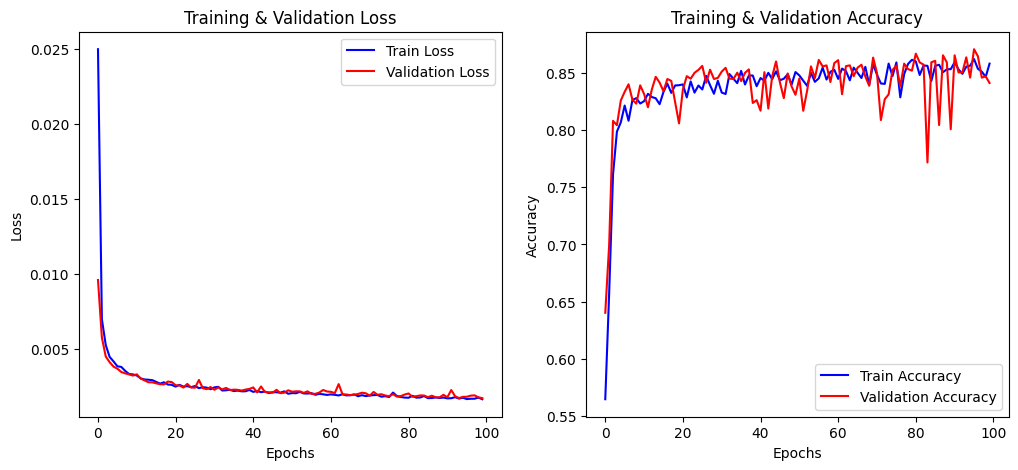

In [8]:

# Load the best model from the folder
best_autoencoder = tf.keras.models.load_model(best_model_folder)

# Save training history to CSV in the results folder
history_df = pd.DataFrame(history.history)
csv_path = os.path.join(results_dir, "autoencoder_baseline_training.csv")
history_df.to_csv(csv_path, index=False)
print(f"Training history saved at: {csv_path}")

# Save the final autoencoder model (from the best model) in TensorFlow format
autoencoder_model_path = os.path.join(models_dir, "autoencoder_baseline_training_tf")
best_autoencoder.save(autoencoder_model_path, save_format="tf")
print(f"Autoencoder model saved at: {autoencoder_model_path}")

# Save only the autoencoder weights
autoencoder_weights_path = os.path.join(weights_dir, "autoencoder_baseline_weights.h5")
best_autoencoder.save_weights(autoencoder_weights_path)
print(f"Autoencoder weights saved at: {autoencoder_weights_path}")

# Extract and save the encoder part of the autoencoder
encoder = best_autoencoder.encoder
encoder_model_path = os.path.join(models_dir, "encoder_baseline_training_tf")
encoder.save(encoder_model_path, save_format="tf")
print(f"Encoder model saved at: {encoder_model_path}")

# Save only the encoder weights
encoder_weights_path = os.path.join(weights_dir, "encoder_baseline_weights.h5")
encoder.save_weights(encoder_weights_path)
print(f"Encoder weights saved at: {encoder_weights_path}")

# Plot Training & Validation Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train Loss', color='blue')
plt.plot(history_df['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")

plt.show()

Autoencoder Model Weights Loaded Successfully from task_2b\autoencoder_weights\autoencoder_baseline_weights.h5
1/1 [==============================] - 1s 929ms/step


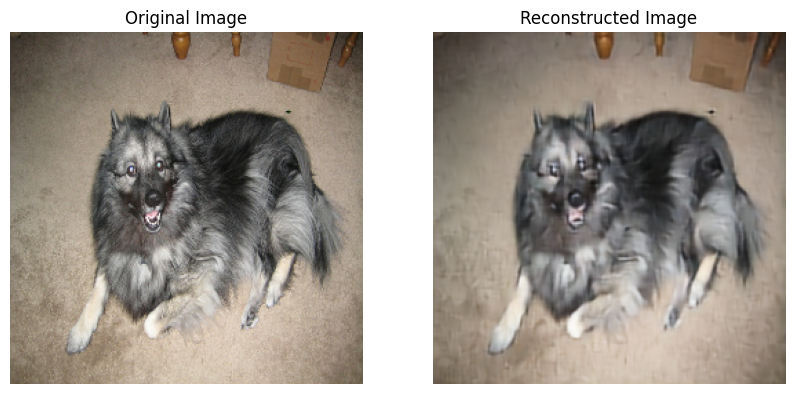

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from autoencoder import Autoencoder

# Define folder paths for weights
top_dir = "task_2b"

# Define subdirectories
weights_dir = os.path.join(top_dir, "autoencoder_weights")


autoencoder_weights_path = os.path.join(weights_dir, "autoencoder_baseline_weights.h5")

# Rebuild the autoencoder model
autoencoder = Autoencoder(input_shape=(256, 256, 3))

# Build the model by calling it with a dummy input
dummy_input = tf.random.normal((1, 256, 256, 3))  # Batch size of 1
autoencoder(dummy_input)  # Ensures layers are built

# Load the saved weights
if os.path.exists(autoencoder_weights_path):
    autoencoder.load_weights(autoencoder_weights_path)
    print(f"Autoencoder Model Weights Loaded Successfully from {autoencoder_weights_path}")
else:
    raise FileNotFoundError(f"Error: Weights file not found at {autoencoder_weights_path}")

# Fetch a batch from the test dataset
test_batch = next(iter(test_ds))  # Get one batch (batch_size, 256, 256, 3)
test_images = test_batch[0].numpy()  # Convert to NumPy array

# Select a random image
random_idx = random.randint(0, test_images.shape[0] - 1)
test_img = np.expand_dims(test_images[random_idx], axis=0)  # Add batch dimension

# Predict (Reconstruct) the image
pred = autoencoder.predict(test_img)

# Display Original & Reconstructed Image
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_img[0])  # Remove batch dimension
plt.title('Original Image')
plt.axis("off")

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(pred[0])  # Remove batch dimension
plt.title('Reconstructed Image')
plt.axis("off")

plt.show()


In [10]:
import tensorflow as tf
import pandas as pd
import os
from autoencoder import Autoencoder

# Define folder paths
top_dir = "task_2b"

# Define subdirectories
weights_dir = os.path.join(top_dir, "autoencoder_weights")
results_dir = os.path.join(top_dir,"autoencoder_training_results")


# Ensure results directory exists
os.makedirs(results_dir, exist_ok=True)

# Define paths for saved weights
autoencoder_weights_path = os.path.join(weights_dir, "autoencoder_baseline_weights.h5")

# Rebuild the autoencoder model
autoencoder = Autoencoder(input_shape=(256, 256, 3))

# Build the model by calling it with a dummy input
dummy_input = tf.random.normal((1, 256, 256, 3))  # Batch size of 1
autoencoder(dummy_input)  # Ensures layers are built

# Load the saved weights
if os.path.exists(autoencoder_weights_path):
    autoencoder.load_weights(autoencoder_weights_path)
    print(f"Autoencoder Model Weights Loaded Successfully from {autoencoder_weights_path}")
else:
    raise FileNotFoundError(f"Error: Weights file not found at {autoencoder_weights_path}")

# Evaluate the model on the test dataset
autoencoder.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
test_loss, test_accuracy = autoencoder.evaluate(test_ds)

# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save test results to CSV
test_results = pd.DataFrame({
    "Metric": ["Test Loss", "Test Accuracy"],
    "Value": [test_loss, test_accuracy]
})
csv_path = os.path.join(results_dir, "autoencoder_baseline_test_results.csv")
test_results.to_csv(csv_path, index=False)
print(f"Test results saved at: {csv_path}")


Autoencoder Model Weights Loaded Successfully from task_2b\autoencoder_weights\autoencoder_baseline_weights.h5
115/115 [==============================] - 16s 124ms/step - loss: 0.0019 - accuracy: 0.8501
Test Loss: 0.0019
Test Accuracy: 0.8501
Test results saved at: task_2b\autoencoder_training_results\autoencoder_baseline_test_results.csv


In [5]:
def process_image_mask(data):
    """Extract image and mask from dictionary"""
    return data['image'], data['segmentation_mask']

# Apply to all datasets
train = train.map(process_image_mask)
val = val.map(process_image_mask)
test = test.map(process_image_mask)

BATCH_SIZE = 32
EPOCHS = 100

# Batch the data and use prefetching to optimize loading speed
train_ds = train.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)



In [6]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from models import build_segmentation_decoder

# Paths where your encoder is saved
top_dir = "task_2b"

models_dir = os.path.join(top_dir, "autoencoder_models")
weights_dir = os.path.join(top_dir,"autoencoder_weights")


encoder_model_path = os.path.join(models_dir, "encoder_baseline_training_tf")
encoder_weights_path = os.path.join(weights_dir, "encoder_baseline_weights.h5")

# Load the Pretrained Encoder
encoder = tf.keras.models.load_model(encoder_model_path)
encoder.load_weights(encoder_weights_path)
print("✅ Pretrained encoder loaded successfully!")

# Build U-Net with pretrained encoder
model = build_segmentation_decoder(encoder, num_classes=3)

### **🔹 Compile Model for Multi-Class Segmentation**
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



✅ Pretrained encoder loaded successfully!


In [7]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from metrics import iou_metric, dice_coefficient
from models import build_segmentation_decoder  

# Define top-level directory
top_dir = "task_2b"

# Directories for the pretrained encoder (assumed to be already saved)
encoder_models_dir = os.path.join(top_dir, "autoencoder_models")  
encoder_weights_dir = os.path.join(top_dir, "autoencoder_weights")

# Directory for saving the best segmentation model
segmentation_model_dir = os.path.join(top_dir, "segmentation_pretrained_model")
os.makedirs(segmentation_model_dir, exist_ok=True)

# Directory for saving training results CSV
results_dir = os.path.join(top_dir, "segmentation_training_results")
os.makedirs(results_dir, exist_ok=True)

# Define the folder path for the best segmentation model (SavedModel format)
best_model_folder = os.path.join(segmentation_model_dir, "segmentation_model_with_pretrained_encoder")

# Load Pretrained Encoder
encoder_model_path = os.path.join(encoder_models_dir, "encoder_baseline_training_tf")
encoder_weights_path = os.path.join(encoder_weights_dir, "encoder_baseline_weights.h5")
encoder = tf.keras.models.load_model(encoder_model_path)
encoder.load_weights(encoder_weights_path)
print("Pretrained encoder loaded successfully!")

# Build Segmentation Model with Pretrained Encoder
segmentation_model = build_segmentation_decoder(encoder, num_classes=3)

# Compile Model with additional metrics
segmentation_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', iou_metric, dice_coefficient]
)

# Define callbacks: Using SavedModel format to avoid HDF5 conflicts.
checkpoint = ModelCheckpoint(
    best_model_folder,  # This is a folder, not a file
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1,
    save_format='tf'  # Save as TensorFlow SavedModel
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train the segmentation model (adjust epochs as needed)
history = segmentation_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[early_stopping, checkpoint]
)

Pretrained encoder loaded successfully!
Epoch 1/100
104/104 [==============================] - ETA: 0s - loss: 0.7828 - accuracy: 0.6559 - iou_metric: 0.7825 - dice_coefficient: 0.6561   
Epoch 1: val_loss improved from inf to 0.64945, saving model to task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 51s 331ms/step - loss: 0.7828 - accuracy: 0.6559 - iou_metric: 0.7825 - dice_coefficient: 0.6561 - val_loss: 0.6495 - val_accuracy: 0.7190 - val_iou_metric: 0.8753 - val_dice_coefficient: 0.7170
Epoch 2/100
104/104 [==============================] - ETA: 0s - loss: 0.6258 - accuracy: 0.7409 - iou_metric: 0.9373 - dice_coefficient: 0.7412  
Epoch 2: val_loss improved from 0.64945 to 0.58037, saving model to task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 26s 244ms/step - loss: 0.6258 - accuracy: 0.7409 - iou_metric: 0.9373 - dice_coefficient: 0.7412 - val_loss: 0.5804 - val_accuracy: 0.7643 - val_iou_metric: 0.9453 - val_dice_coefficient: 0.7619
Epoch 3/100
104/104 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.7717 - iou_metric: 0.9915 - dice_coefficient: 0.7718 
Epoch 3: val_loss improved from 0.58037 to 0.55243, saving model to task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 30s 284ms/step - loss: 0.5627 - accuracy: 0.7717 - iou_metric: 0.9915 - dice_coefficient: 0.7718 - val_loss: 0.5524 - val_accuracy: 0.7752 - val_iou_metric: 0.9461 - val_dice_coefficient: 0.7734
Epoch 4/100
104/104 [==============================] - ETA: 0s - loss: 0.5272 - accuracy: 0.7870 - iou_metric: 1.0193 - dice_coefficient: 0.7872  
Epoch 4: val_loss improved from 0.55243 to 0.50012, saving model to task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 31s 294ms/step - loss: 0.5272 - accuracy: 0.7870 - iou_metric: 1.0193 - dice_coefficient: 0.7872 - val_loss: 0.5001 - val_accuracy: 0.7972 - val_iou_metric: 1.0113 - val_dice_coefficient: 0.7946
Epoch 5/100
104/104 [==============================] - ETA: 0s - loss: 0.4978 - accuracy: 0.8007 - iou_metric: 1.0458 - dice_coefficient: 0.8009  
Epoch 5: val_loss did not improve from 0.50012
104/104 [==============================] - 24s 225ms/step - loss: 0.4978 - accuracy: 0.8007 - iou_metric: 1.0458 - dice_coefficient: 0.8009 - val_loss: 0.5056 - val_accuracy: 0.7953 - val_iou_metric: 0.9834 - val_dice_coefficient: 0.7934
Epoch 6/100
104/104 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.8131 - iou_metric: 1.0693 - dice_coefficient: 0.8131 
Epoch 6: val_loss improved from 0.50012 to 0.47637, saving model to task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 30s 290ms/step - loss: 0.4678 - accuracy: 0.8131 - iou_metric: 1.0693 - dice_coefficient: 0.8131 - val_loss: 0.4764 - val_accuracy: 0.8100 - val_iou_metric: 1.0203 - val_dice_coefficient: 0.8083
Epoch 7/100
104/104 [==============================] - ETA: 0s - loss: 0.4505 - accuracy: 0.8205 - iou_metric: 1.0833 - dice_coefficient: 0.8206  
Epoch 7: val_loss did not improve from 0.47637
104/104 [==============================] - 24s 226ms/step - loss: 0.4505 - accuracy: 0.8205 - iou_metric: 1.0833 - dice_coefficient: 0.8206 - val_loss: 0.4777 - val_accuracy: 0.8087 - val_iou_metric: 1.0086 - val_dice_coefficient: 0.8070
Epoch 8/100
104/104 [==============================] - ETA: 0s - loss: 0.4321 - accuracy: 0.8280 - iou_metric: 1.0979 - dice_coefficient: 0.8282 
Epoch 8: val_loss did not improve from 0.47637
104/104 [==============================] - 23s 224ms/step - loss: 0.4321 - accuracy: 0.8280 - iou_metric: 1.0979 - dice_coefficient: 0.82

INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 29s 281ms/step - loss: 0.4298 - accuracy: 0.8296 - iou_metric: 1.1003 - dice_coefficient: 0.8298 - val_loss: 0.4149 - val_accuracy: 0.8355 - val_iou_metric: 1.0994 - val_dice_coefficient: 0.8339
Epoch 10/100
104/104 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.8355 - iou_metric: 1.1125 - dice_coefficient: 0.8356 
Epoch 10: val_loss did not improve from 0.41493
104/104 [==============================] - 24s 226ms/step - loss: 0.4145 - accuracy: 0.8355 - iou_metric: 1.1125 - dice_coefficient: 0.8356 - val_loss: 0.4408 - val_accuracy: 0.8255 - val_iou_metric: 1.0526 - val_dice_coefficient: 0.8241
Epoch 11/100
104/104 [==============================] - ETA: 0s - loss: 0.3992 - accuracy: 0.8422 - iou_metric: 1.1244 - dice_coefficient: 0.8425 
Epoch 11: val_loss improved from 0.41493 to 0.39576, saving model to task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 30s 290ms/step - loss: 0.3992 - accuracy: 0.8422 - iou_metric: 1.1244 - dice_coefficient: 0.8425 - val_loss: 0.3958 - val_accuracy: 0.8438 - val_iou_metric: 1.1286 - val_dice_coefficient: 0.8428
Epoch 12/100
104/104 [==============================] - ETA: 0s - loss: 0.3800 - accuracy: 0.8501 - iou_metric: 1.1411 - dice_coefficient: 0.8503  
Epoch 12: val_loss did not improve from 0.39576
104/104 [==============================] - 24s 226ms/step - loss: 0.3800 - accuracy: 0.8501 - iou_metric: 1.1411 - dice_coefficient: 0.8503 - val_loss: 0.4192 - val_accuracy: 0.8355 - val_iou_metric: 1.0711 - val_dice_coefficient: 0.8345
Epoch 13/100
104/104 [==============================] - ETA: 0s - loss: 0.3729 - accuracy: 0.8524 - iou_metric: 1.1443 - dice_coefficient: 0.8525 
Epoch 13: val_loss did not improve from 0.39576
104/104 [==============================] - 24s 226ms/step - loss: 0.3729 - accuracy: 0.8524 - iou_metric: 1.1443 - dice_coefficient: 

INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


INFO:tensorflow:Assets written to: task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder\assets


104/104 [==============================] - 30s 292ms/step - loss: 0.3532 - accuracy: 0.8603 - iou_metric: 1.1604 - dice_coefficient: 0.8604 - val_loss: 0.3871 - val_accuracy: 0.8492 - val_iou_metric: 1.1221 - val_dice_coefficient: 0.8482
Epoch 16/100
104/104 [==============================] - ETA: 0s - loss: 0.3358 - accuracy: 0.8679 - iou_metric: 1.1754 - dice_coefficient: 0.8681  
Epoch 16: val_loss did not improve from 0.38706
104/104 [==============================] - 24s 226ms/step - loss: 0.3358 - accuracy: 0.8679 - iou_metric: 1.1754 - dice_coefficient: 0.8681 - val_loss: 0.4221 - val_accuracy: 0.8394 - val_iou_metric: 1.0787 - val_dice_coefficient: 0.8386
Epoch 17/100
104/104 [==============================] - ETA: 0s - loss: 0.3316 - accuracy: 0.8693 - iou_metric: 1.1774 - dice_coefficient: 0.8695 
Epoch 17: val_loss did not improve from 0.38706
104/104 [==============================] - 24s 228ms/step - loss: 0.3316 - accuracy: 0.8693 - iou_metric: 1.1774 - dice_coefficient: 

115/115 [==============================] - 14s 107ms/step - loss: 0.3993 - accuracy: 0.8478 - iou_metric: 1.1331 - dice_coefficient: 0.8478

Best Segmentation Model Test Metrics:
Loss: 0.3993, Accuracy: 0.8478
IoU: 1.1331, Dice Coefficient: 0.8478
Training history saved at: task_2b\segmentation_training_results\segmentation_baseline_training.csv


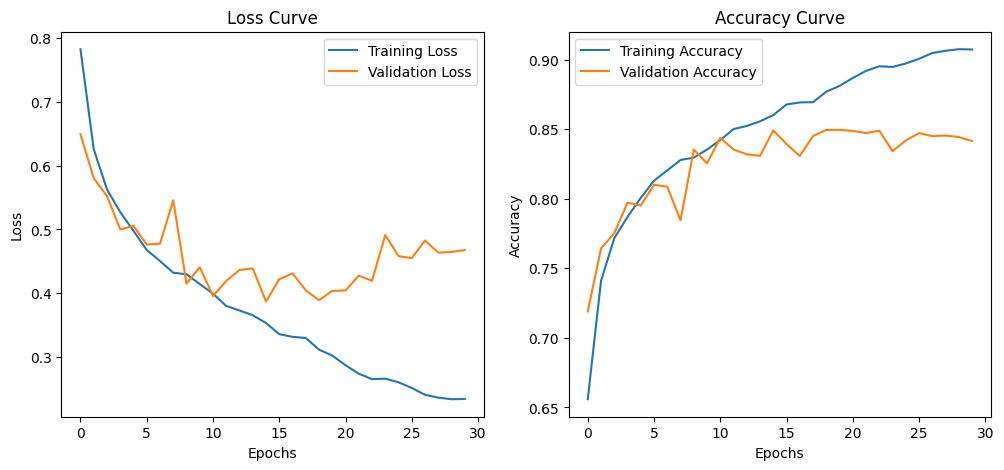

Model training complete! Best segmentation model is saved at task_2b\segmentation_pretrained_model\segmentation_model_with_pretrained_encoder


In [8]:
# Load the best segmentation model from the SavedModel folder
best_segmentation_model = tf.keras.models.load_model(
    best_model_folder,
    custom_objects={'iou_metric': iou_metric, 'dice_coefficient': dice_coefficient}
)

# Evaluate the best segmentation model on the test dataset
test_loss, test_accuracy, test_iou, test_dice = best_segmentation_model.evaluate(test_ds)
print("\nBest Segmentation Model Test Metrics:")
print(f"Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")
print(f"IoU: {test_iou:.4f}, Dice Coefficient: {test_dice:.4f}")

# Save the training history as a CSV file in the segmentation_training_results folder
csv_path = os.path.join(results_dir, "segmentation_baseline_training.csv")
history_df = pd.DataFrame(history.history)
history_df.to_csv(csv_path, index=False)
print(f"Training history saved at: {csv_path}")

# Function to plot training progress
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot Loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Loss Curve')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    # Plot Accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title('Accuracy Curve')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    
    plt.show()

# Plot the training history
plot_training_history(history)

print(f"Model training complete! Best segmentation model is saved at {best_model_folder}")